# Machine Learning - Tarea 1
---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [35]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.model_selection import KFold, train_test_split

## 1.- LSS
---
### 1.a

#### Construcción del Dataframe

In [36]:
df = pd.read_csv("kc_house_data.csv", sep=',', header=0)
df = df.drop(["id", "date", "zipcode"], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


---
### 1.b

#### Descripción de la data

In [37]:
df.shape

(21613, 18)

Tenemos 21613 datos, con 18 atributos cada uno. Tipos de datos:

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


---
Información estadística de los atributos.

In [39]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


---
### 1.c

Como podemos ver, los datos tienen diferentes ordenes de magnitud, por lo que resulta deseable normalizar para poder comparar mas facilmente.

In [40]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled["price"] = np.log(df["price"])
df_scaled

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309982,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,13.195614,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,12.100712,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,13.311329,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,13.142166,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849
5,14.018451,0.676485,3.097133,3.636791,2.096185,-0.915427,-0.087173,-0.305759,-0.629187,2.844170,2.537955,2.798440,1.021181,-0.210128,0.693181,1.483375,4.046611,3.265566
6,12.458775,-0.398737,0.175607,-0.397313,-0.200098,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.088628,-0.658681,0.816910,-0.210128,-1.806810,-0.803149,0.366876,-0.217900
7,12.583995,-0.398737,-0.798235,-1.110494,-0.130276,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.879623,-0.658681,-0.272536,-0.210128,-1.086547,-0.717937,-0.491048,-0.111980
8,12.343658,-0.398737,-1.447464,-0.326539,-0.184381,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.891699,0.990795,-0.374672,-0.210128,-0.344633,-0.874160,-0.301371,-0.170507
9,12.685408,-0.398737,0.500221,-0.206768,-0.206351,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.122706,-0.658681,1.089271,-0.210128,-1.383168,1.298749,0.588652,-0.190395


---
### 1.d

Importancia de:
```python
X.insert(X.shape[1], "intercept", np.ones(N))
```
Necesitamos agregar esta columna con puros numeros 1 para permitir que el hiperplano definido por $\hat{\beta}$ no pase por el origen (supuesto fuerte), lo que permite que la solución se ajuste mejor a la data.

Parámetros de las funciones de regresión:
```python
linreg = lm.LinearRegression(fit_intercept=False)
linreg.fit(Xtrain, ytrain)
```
Ponemos `fit_intercept=False` ya que normalizamos previamente la data.  
`Xtrain` es nuestro _train set_, con un 70% de los datos para poder hacer _validation_.  
`ytrain` es el 70% del _target_. Sobre ellos se realizará LS.

In [41]:
X = df_scaled.iloc[:, 1:] # integer-location, for selection
N = X.shape[0] # N, dataset size
X.insert(X.shape[1], "intercept", np.ones(N))
y = df_scaled["price"]

mask = np.zeros(X.shape[0])
limit = int(X.shape[0] * 0.7)
mask[:limit] = 1
istrain = (mask == 1)
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

linreg = lm.LinearRegression(fit_intercept=False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Podemos ver los coeficientes

In [42]:
coefs = linreg.predict(np.eye(18))
coefs # \beta

array([ -8.26987934e-03,   5.59597464e-02,   5.77687964e-02,
         2.21594833e-02,   3.75946006e-02,   3.35263653e-02,
         4.20824650e-02,   4.52767575e-02,   1.86212419e-01,
         4.71301183e-02,   3.16990298e-02,  -1.09875223e-01,
         1.47981265e-02,   1.86277321e-01,  -4.07918551e-03,
         8.59326727e-02,  -7.01264301e-03,   1.30396924e+01])

In [43]:
delta_y = ytrain - linreg.predict(Xtrain) # y - \hat{y}
sigma2 = delta_y.dot(delta_y) / (Xtrain.shape[0]-coefs.shape[0]-1)
sigma = np.sqrt(sigma2)
sigma # \hat{sigma}

0.25416027782055922

In [44]:
X_U, X_Sigma, X_VT = sp.linalg.svd(X, full_matrices=False)
X_Sigma_inv = 1/X_Sigma
v = (X_Sigma_inv**2) * (np.diag(X_VT)**2)
v

array([  5.70160596e-07,   3.59609696e-08,   6.62577908e-10,
         1.74848446e-08,   8.05863395e-07,   1.10518125e-30,
         8.32561801e-07,   2.61613328e-05,   3.80896694e-10,
         5.14550144e-07,   8.48405906e-06,   1.13111906e-08,
         5.30775156e-06,   1.99988262e-08,   2.98409851e-09,
         7.57272131e-05,   7.94187954e-07,   9.10778870e-05])

In [45]:
z_scores = coefs / (sigma * np.sqrt(v))
z_scores

array([ -4.30916275e+01,   1.16105385e+03,   8.83013142e+03,
         6.59357672e+02,   1.64773393e+02,   1.25476398e+14,
         1.81461816e+02,   3.48287356e+01,   3.75402676e+04,
         2.58509794e+02,   4.28189933e+01,  -4.06478829e+03,
         2.52722416e+01,   5.18262821e+03,  -2.93805013e+02,
         3.88530087e+01,  -3.09608166e+01,   5.37592496e+03])

---
### 1.f

In [161]:
yhat_test = linreg.predict(Xtest)
mse_test = np.mean(np.power(yhat_test - ytest, 2)) # mean square error

Xtm = Xtest.as_matrix()
ytm = ytest.as_matrix()

Xm = Xtrain.as_matrix()
ym = ytrain.as_matrix()
kf = KFold(n_splits=10)
mse_cv10 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv10 += mse_fold
mse_cv10 = mse_cv10 / 10

kf = KFold(n_splits=5)
mse_cv5 = 0
for train, val in kf.split(Xm):
    linreg = lm.LinearRegression(fit_intercept = False)
    linreg.fit(Xm[train], ym[train])
    yhat_val = linreg.predict(Xm[val])
    mse_fold = np.mean(np.power(yhat_val - ym[val], 2))
    mse_cv5 += mse_fold
mse_cv5 = mse_cv5 / 5

In [47]:
print("MSE - test    :", mse_test)
print("MSE - 5-fold  :", mse_cv5)
print("MSE - 10-fold :", mse_cv10)

MSE - test    : 0.0652592512373
MSE - 5-fold  : 0.0646912815639
MSE - 10-fold : 0.0646824320504


Los errores resultan similares en los tres casos, lo cual es razonable tomando en cuenta la cantidad de datos. Esto también permite asumir con cierta certeza que este error no esta sujeto al _train set_ (no existe _under_ u _overfitting_).

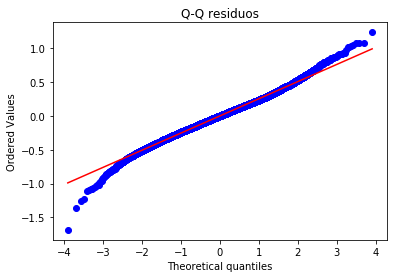

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
res = sp.stats.probplot(delta_y, dist=sp.stats.norm, plot=ax)
ax.set_title("Q-Q residuos")
plt.show()

Podemos ver en el gráfico Q-Q que tenemos una amplia sección lineal, lo que nos permite concluir que la hipótesis de normalidad sobre los residuos es razonable con este modelo.

---
### 1.h

In [98]:
df_A = df_scaled.sample(3000)
frames = []
valor = df_scaled.price
for z in np.arange(int(np.min(valor)),int(np.max(valor))+1,0.5):
    frames.append(df_scaled[(df_scaled.price >= z) & (df_scaled.price < z+0.5)].head(500))
df_B = pd.concat(frames).sample(3000)
X_A = df_A.iloc[:,1:].values
y_A = np.log(df_A.price)
X_B = df_B.iloc[:,1:].values
y_B = np.log(df_B.price)

Xtrain_A, Xval_A, ytrain_A, yval_A = train_test_split(X_A, y_A, test_size=0.3, random_state=42)
Xtrain_B, Xval_B, ytrain_B, yval_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [99]:
linregA = lm.LinearRegression(fit_intercept=False)
linregA.fit(Xtrain_A, ytrain_A)

linregB = lm.LinearRegression(fit_intercept=False)
linregB.fit(Xtrain_B, ytrain_B)

deltay_A = yval_A - linregA.predict(Xval_A)
deltay_B = yval_B - linregB.predict(Xval_B)

err_A = np.mean(np.power(deltay_A, 2))
err_B = np.mean(np.power(deltay_B, 2))

print("Error A:", err_A)
print("Error B:", err_B)

Error A: 6.40729093481
Error B: 5.53445153268


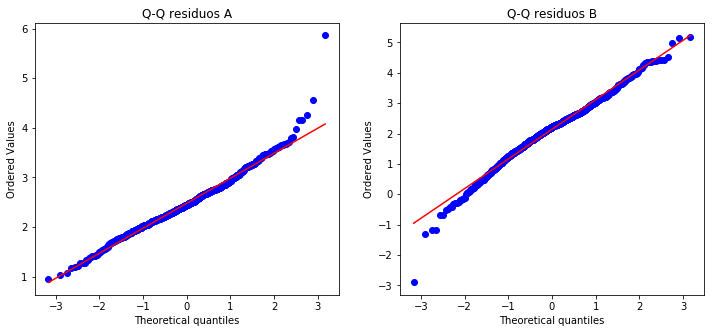

In [106]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(121)
res1 = sp.stats.probplot(deltay_A, dist=sp.stats.norm, plot=ax1)
ax1.set_title("Q-Q residuos A")

ax2 = fig.add_subplot(122)
res2 = sp.stats.probplot(deltay_B, dist=sp.stats.norm, plot=ax2)
ax2.set_title("Q-Q residuos B")

plt.show()

---

---
# 2

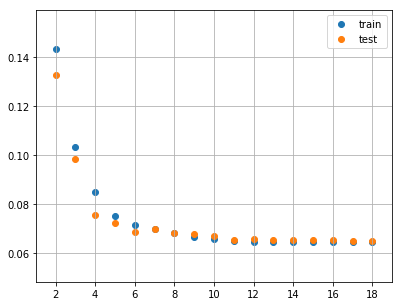

In [181]:
def fss(x, y, x_t, y_t, names_x, k = 10000, verbose=False):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 0.0
    mse_list_train = []
    mse_list_test = []
    while remaining and len(selected)<=k :
        score_candidates = []
        model = lm.LinearRegression(fit_intercept=False)
        
        for candidate in remaining:
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        
        if verbose:
            print("selected = %s"%names_x[best_candidate])
            print("totalvars = %d,\nmse = %f"%(len(indexes),best_new_score))
            print()
        
        x_train = x[:, selected]
        x_test = x_t[:, selected]
        current_model = model.fit(x_train, y)
        predictions_train_res = y - current_model.predict(x_train)
        predictions_test_res = y_t - current_model.predict(x_test)
        mse_list_train.append(np.mean(np.power(predictions_train_res, 2)))
        mse_list_test.append(np.mean(np.power(predictions_test_res, 2)))
        
    return selected, mse_list_train, mse_list_test

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]
# las listas estan ordenadas por el numero de dimensiones del modelo
attr_indexes, train_mse, test_mse = fss(Xm, ym, Xtm, ytm, names_regressors)

fig = plt.figure(figsize=(14, 5))
ax1 = fig.add_subplot(121)
ax1.scatter(range(2,2+len(train_mse)), train_mse, label="train")
ax1.scatter(range(2,2+len(test_mse)), test_mse, label="test")
ax1.legend()
ax1.grid()

plt.show()

In [153]:
def fss2(x, y, names_x, k = 10000, tol = 4):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 0.0
    delta_error = 0.0
    # delta error absoluto
    while (remaining) and (len(selected) <= k) and (delta_error / tol <= np.abs(aux_score - best_new_score)):
        score_candidates = []
        delta_error = np.abs(aux_score - best_new_score)
        
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s"%names_x[best_candidate])
        print("totalvars = %d\nmse = %f"%(len(indexes),best_new_score))
        print("delta/delta = {0}".format(delta_error/(aux_score - best_new_score)))
        print()
        
    return selected

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]
fss2(Xm,ym,names_regressors)

selected = grade
totalvars = 2
mse = 0.143260
delta/delta = -0.0

selected = lat-long
totalvars = 3
mse = 0.103340
delta/delta = 3.5886752373403885

selected = sqft_living
totalvars = 4
mse = 0.084960
delta/delta = 2.171899629118386

selected = yr_built
totalvars = 5
mse = 0.075447
delta/delta = 1.932133986172504

selected = view
totalvars = 6
mse = 0.071782
delta/delta = 2.5954482291372676

selected = sqft_lot15
totalvars = 7
mse = 0.069979
delta/delta = 2.033354798131206

selected = bathrooms
totalvars = 8
mse = 0.068251
delta/delta = 1.0428218120320643

selected = condition
totalvars = 9
mse = 0.066864
delta/delta = 1.2466793037607606

selected = waterfront
totalvars = 10
mse = 0.065836
delta/delta = 1.3485828955830226

selected = floors
totalvars = 11
mse = 0.065107
delta/delta = 1.4104919024380613

selected = sqft_lot
totalvars = 12
mse = 0.064820
delta/delta = 2.540778596953535

selected = yr_renovated
totalvars = 13
mse = 0.064619
delta/delta = 1.4281834678965284

selected = bed

[17, 8, 13, 2, 11, 6, 15, 1, 7, 5, 4, 3, 12, 0]

In [167]:
def fss3(x, y, names_x, k = 10000, tol = 0.005):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = list(range(0, p))
    selected = [p]
    current_score = 0.0
    best_new_score = 0.0
    aux_score = 1.0
    # error absoluto
    while (remaining) and (len(selected) <= k) and (tol <= np.abs(aux_score - best_new_score)):
        score_candidates = []
        delta_error = np.abs(aux_score - best_new_score)
        
        for candidate in remaining:
            model = lm.LinearRegression(fit_intercept=False)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
            
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        aux_score = best_new_score
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print("selected = %s"%names_x[best_candidate])
        print("totalvars = %d\nmse = %f"%(len(indexes),best_new_score))
        print("delta/delta = {0}".format(aux_score - best_new_score))
        print()
        
    return selected

names_regressors = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view",
"condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","lat-long",
"sqft_living15","sqft_lot15","intercept"]
fss3(Xm,ym,names_regressors)

selected = grade
totalvars = 2
mse = 0.143260
delta/delta = -0.14326033079203015

selected = lat-long
totalvars = 3
mse = 0.103340
delta/delta = 0.03992011573000463

selected = sqft_living
totalvars = 4
mse = 0.084960
delta/delta = 0.018380276507625234

selected = yr_built
totalvars = 5
mse = 0.075447
delta/delta = 0.009512940944657766

selected = view
totalvars = 6
mse = 0.071782
delta/delta = 0.0036652401068388435



[17, 8, 13, 2, 11, 6]

---

---
# 3